In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas_profiling as pdf
from sklearn import preprocessing 

In [8]:
#print multiple statements in same line
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity ="all"
%matplotlib inline

In [12]:
dfDemand  = pd.read_csv("test.csv")

In [15]:
dfDemand.head()
dfDemand.tail()
dfDemand.info()
dfDemand.describe()

,Feeder,Demand,Revenue,ConsumptionDate
0,Feeder_75,858,5641,2019-01-01
1,Feeder_75,182,1246,2019-02-01
2,Feeder_75,164,1128,2019-03-01
3,Feeder_75,187,1334,2019-04-01
4,Feeder_75,225,1521,2019-05-01


,Feeder,Demand,Revenue,ConsumptionDate
1,Feeder_75,182,1246,2019-02-01
2,Feeder_75,164,1128,2019-03-01
3,Feeder_75,187,1334,2019-04-01
4,Feeder_75,225,1521,2019-05-01
5,Feeder_75,228,1772,2019-06-01


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 4 columns):
Feeder             6 non-null object
Demand             6 non-null int64
Revenue            6 non-null int64
ConsumptionDate    6 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 320.0+ bytes


,Demand,Revenue
count,6.000000,6.000000
mean,307.333333,2107.000000
std,270.938861,1745.970676
min,164.000000,1128.000000
25%,183.250000,1268.000000
50%,206.000000,1427.500000
75%,227.250000,1709.250000
max,858.000000,5641.000000


In [18]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')
data = pd.read_csv('test.csv', parse_dates=['ConsumptionDate'], index_col='ConsumptionDate',date_parser=dateparse)
print ('\n Parsed Data:')
print (data.head())


 Parsed Data:
                    Feeder  Demand  Revenue
ConsumptionDate                            
2019-01-01       Feeder_75     858     5641
2019-02-01       Feeder_75     182     1246
2019-03-01       Feeder_75     164     1128
2019-04-01       Feeder_75     187     1334
2019-05-01       Feeder_75     225     1521


In [14]:
#dfDemand['ConsumptionDate'] = pd.to_datetime(dfDemand.ConsumptionDate, infer_datetime_format=True , format=('%Y-%m-%d %H:%M'))
#dfDemand.ConsumptionDate.describe()

count                       6
unique                      6
top       2019-04-01 00:00:00
freq                        1
first     2019-01-01 00:00:00
last      2019-06-01 00:00:00
Name: ConsumptionDate, dtype: object

In [37]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):    
    #Determing rolling statistics
    #rolmean = pd.rolling_mean(timeseries, window=12)
    rolmean = timeseries.rolling(12).mean()
    rolstd = pd.Series(timeseries).rolling(window=12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

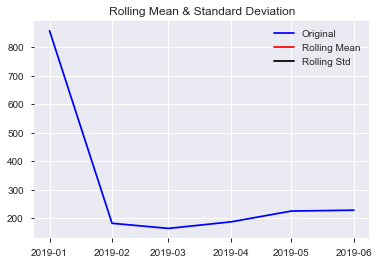

Results of Dickey-Fuller Test:
Test Statistic                -1.110975
p-value                        0.710675
#Lags Used                     1.000000
Number of Observations Used    4.000000
Critical Value (1%)           -7.355441
Critical Value (5%)           -4.474365
Critical Value (10%)          -3.126933
dtype: float64


In [38]:
test_stationarity(ts)

In [ ]:
ts = data['Demand']
ts.head(10)

In [26]:
ts[:'2019-04-01']

ConsumptionDate
2019-01-01    858
2019-02-01    182
2019-03-01    164
2019-04-01    187
Name: Demand, dtype: int64

In [ ]:
plt.plot(ts)

ConsumptionDate
2019-01-01    6.754604
2019-02-01    5.204007
2019-03-01    5.099866
2019-04-01    5.231109
2019-05-01    5.416100
2019-06-01    5.429346
Name: Demand, dtype: float64

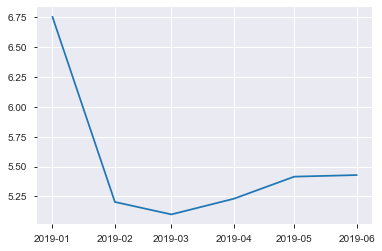

In [47]:
ts_log = np.log(ts)
plt.plot(ts_log)
ts_log

In [48]:
moving_avg = ts_log.rolling(2).mean()
moving_avg

ConsumptionDate
2019-01-01         NaN
2019-02-01    5.979305
2019-03-01    5.151937
2019-04-01    5.165488
2019-05-01    5.323605
2019-06-01    5.422723
Name: Demand, dtype: float64

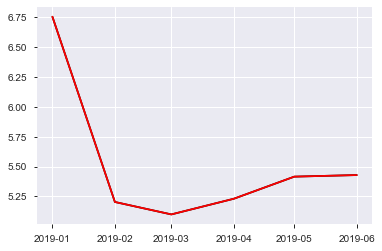

In [51]:
moving_avg = ts_log.rolling(1).mean()
plt.plot(ts_log, color='black')
plt.plot(moving_avg, color='red')

In [52]:
from statsmodels.tsa.arima_model import ARIMA

In [53]:
ts_log = np.log(ts)

In [70]:
model = ARIMA(ts_log, order=(0, 0, 3))  
results_MA = model.fit(disp=-1) 

C:\Users\kiran\Anaconda3\envs\TimeSeries\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\kiran\Anaconda3\envs\TimeSeries\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


In [71]:
results_MA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                 Demand   No. Observations:                    6
Model:                     ARMA(0, 3)   Log Likelihood                  -4.123
Method:                       css-mle   S.D. of innovations              0.321
Date:                Tue, 14 Jan 2020   AIC                             18.245
Time:                        08:55:03   BIC                             17.204
Sample:                    01-01-2019   HQIC                            14.077
                         - 06-01-2019                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            5.3988      0.089     60.681      0.000       5.224       5.573
ma.L1.Demand    -1.5553      1.516     -1.026      0.413      -4.527       1.416
ma.L2.Demand     0.1107      1.771      0.063      0.956      -3.360       3.581
ma.L3.Demand     0.4446      0.978      0.455      0.694      -1.473       2.362
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            1.0000           -0.0004j            1.0000           -0.0001
MA.2            1.0000           +0.0004j            1.0000            0.0001
MA.3           -2.2491           -0.0000j            2.2491           -0.5000
-----------------------------------------------------------------------------
"""

Text(0.5, 1.0, 'RSS: 2.1132')

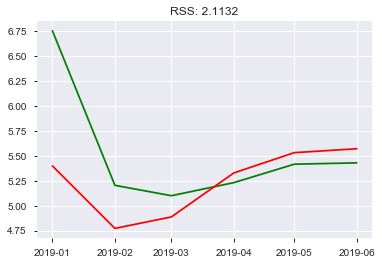

In [73]:
plt.plot(ts_log , color='green')
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-ts_log)**2))